# **Lennard-Jones gas**

In this code we simulate a set of N particles subjected to Lennard-Jones interactions and confined in a 2D rectangular box. We do this by using the 12-6 Lennard-Jones potential. Then, we solve numerically the Newton's law of motion using Runge-kutta 4. Besides, we use a rustic method of adaptive step by reducing the time step when two particles are *close enough*. The condition for *close enough* is that any of the forces between the particles be greater than or equal to `F0`, which is the Lennard-Jones force between two particles at some distant `R0`. This distance must be choose by the user.

**Credits**
* Juan Andrés Guarín Rojas
* [GitHub](https://github.com/AndresGuarin)

# **Import libraries**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import LJGas.solver.particles as partic
import LJGas.solver.animation as ani
import LJGas.analysis.pressure as press

from LJGas.analysis.visualization import moving_mean

from datetime import datetime

# **1. Test Simulation of 30 particles**

In [18]:
# Choose parameters 
h = 0.03; N = 16000; R0 = 1.05; h0 = 0.01; box=[50,25]

# Set intial conditions
Np = 50; v0 = 2

np.random.seed(174489)
noise = np.random.random(Np)*(0)

X0 = np.random.random(Np)*(box[0]-2*R0) - (box[0]-2*R0)/2 + noise
Y0 = np.random.random(Np)*(box[1]-2*R0) - (box[1]-2*R0)/2
Theta0 = np.random.random(Np)*2*np.pi - np.pi
Vx0 = v0*np.cos(Theta0) + np.random.random(Np)*0.1 - 0.05
Vy0 = v0*np.sin(Theta0) + np.random.random(Np)*0.1 - 0.05

#X0 = Xf; Y0 = Yf; Vx0 = Vxf; Vy0 = Vyf

sim = partic.LJGas(h,N,Np,R0,h0,box,verbose=False)
s = sim.simulate([X0,Y0,Vx0,Vy0])

self1 = sim.get_self()
Lh = self1.Lh
time = np.zeros(N+1)
for i in range(N):
    time[i+1] = time[i]+Lh[i]

In [19]:
print(np.mean(Vx0), np.mean(Vy0))
print(np.max(Vx0), np.max(Vy0))

0.16837535032561168 0.18343736819529885
2.0061354582541884 2.020098771383399


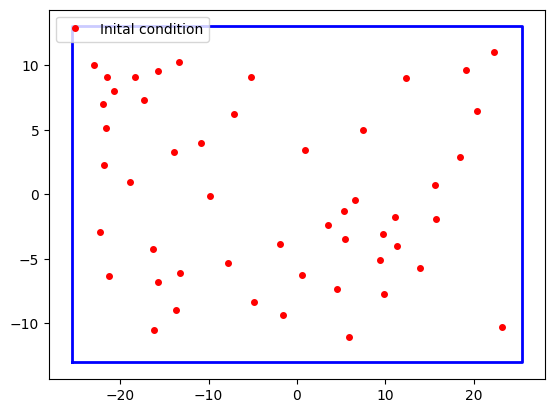

In [20]:
%matplotlib inline

Xf = s[0][-1,:]; Yf = s[1][-1,:]; Vxf = s[2][-1,:]; Vyf = s[3][-1,:]

b0 = box[0]/2 + R0/2; b1 = box[1]/2 + R0/2
plt.plot([-b0,b0,b0,-b0,-b0],[-b1,-b1,b1,b1,-b1],'-b',lw=2)
plt.plot(X0,Y0,'or',ms=4,label='Inital condition')
#plt.plot(X0,Y0,'or',ms=4,label='Final condition')
plt.legend(loc='upper left')
plt.show()

# **2. Animation**

In [21]:
#date = '01-25_24-48-00'
#date = datetime.now().strftime("%m-%d_%H-%M-%S")
date = 'ideal_gas_40'
local_save = False

In [22]:
%matplotlib auto
%matplotlib auto

anim = ani.animate_path(self1,s,duration=200,kind=0,save=False,name=date+'test.mp4',verbose=True,plot_params=['-b','or',1,5,0.3],amp=1,interval=50)
plt.show()

Using matplotlib backend: QtAgg
Using matplotlib backend: QtAgg


# **3. Analysis**

In [23]:
%matplotlib inline

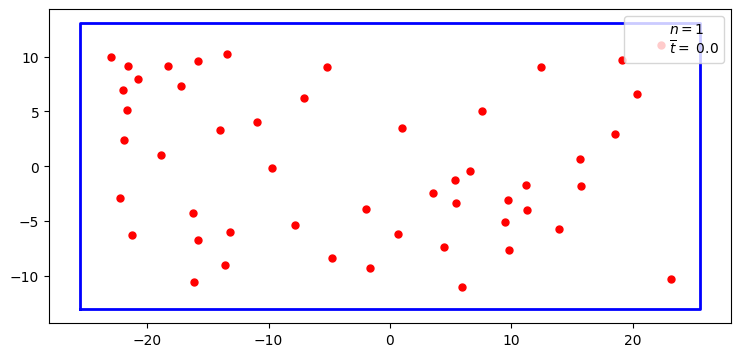

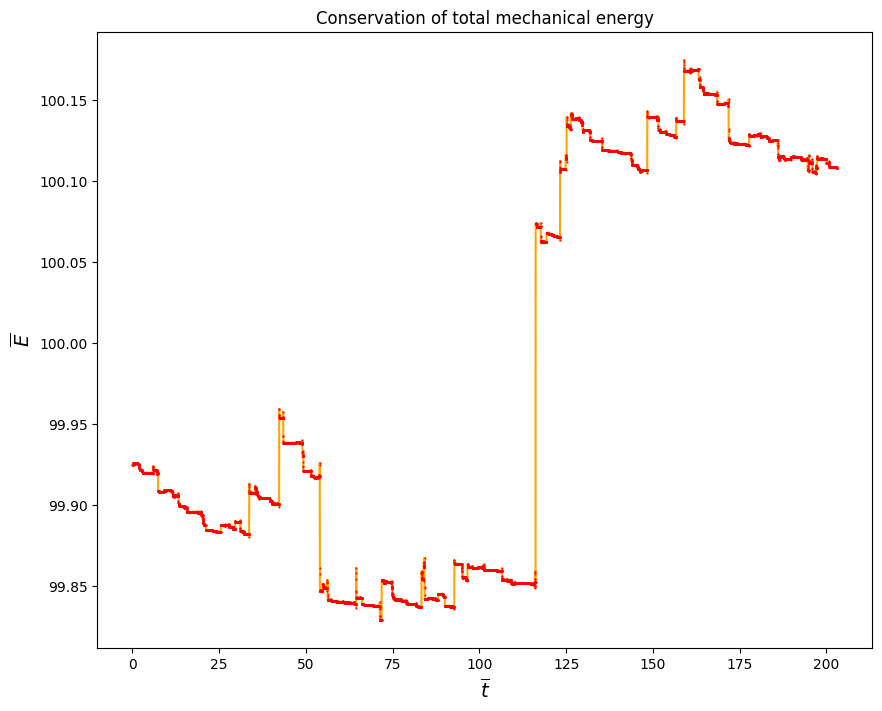

In [24]:
Em = sim.get_Energy(s)[2]

plt.figure(figsize=(10,8))
plt.title('Conservation of total mechanical energy')
plt.ylabel(r'$\overline{E}$',fontsize=14)
plt.xlabel(r'$\overline{t}$',fontsize=14)
plt.plot(time,Em,'-',color='orange') ;plt.plot(time,Em,'o',color='red', ms=0.5)
if local_save: plt.savefig('images/NParticlesGas/'+date+' mechanical_energy.png',dpi=350)
plt.show()

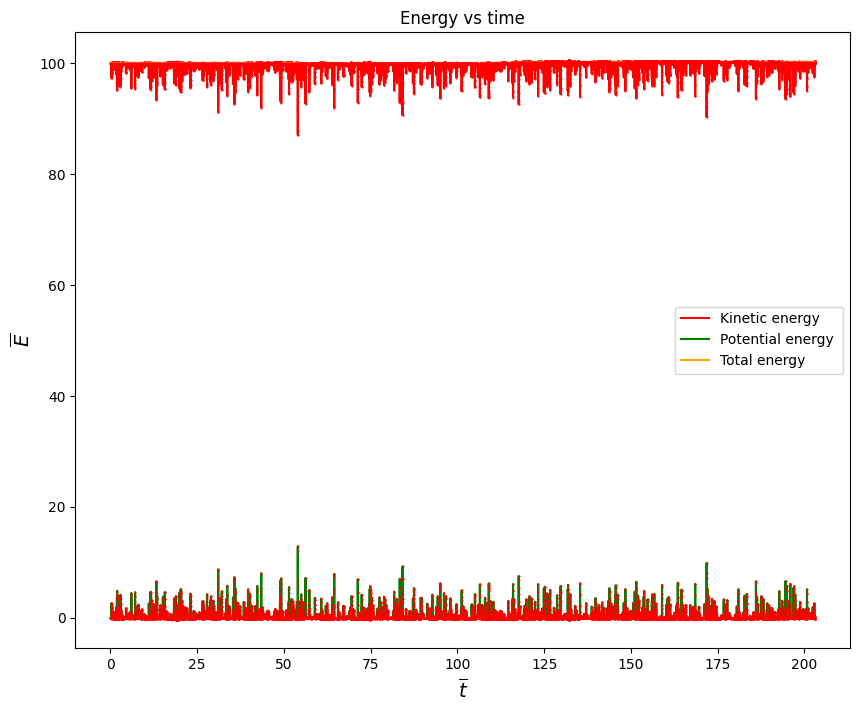

In [25]:
Ek, V, Em  = sim.get_Energy(s)

plt.figure(figsize=(10,8))
plt.title('Energy vs time')
plt.ylabel(r'$\overline{E}$',fontsize=14)
plt.xlabel(r'$\overline{t}$',fontsize=14)
plt.plot(time, Ek,'-',color='red',label = 'Kinetic energy') ;plt.plot(time, Ek,'o',color='red', ms=0.5)
plt.plot(time, V,'-',color='green',label = 'Potential energy ') ;plt.plot(time, V,'o',color='red', ms=0.5)
plt.plot(time, Em,'-',color='orange',label = 'Total energy') ;plt.plot(time, Em,'o',color='red', ms=0.5)
plt.legend()
if local_save: plt.savefig('images/NParticlesGas/'+date+' energy.png',dpi=350)
plt.show()

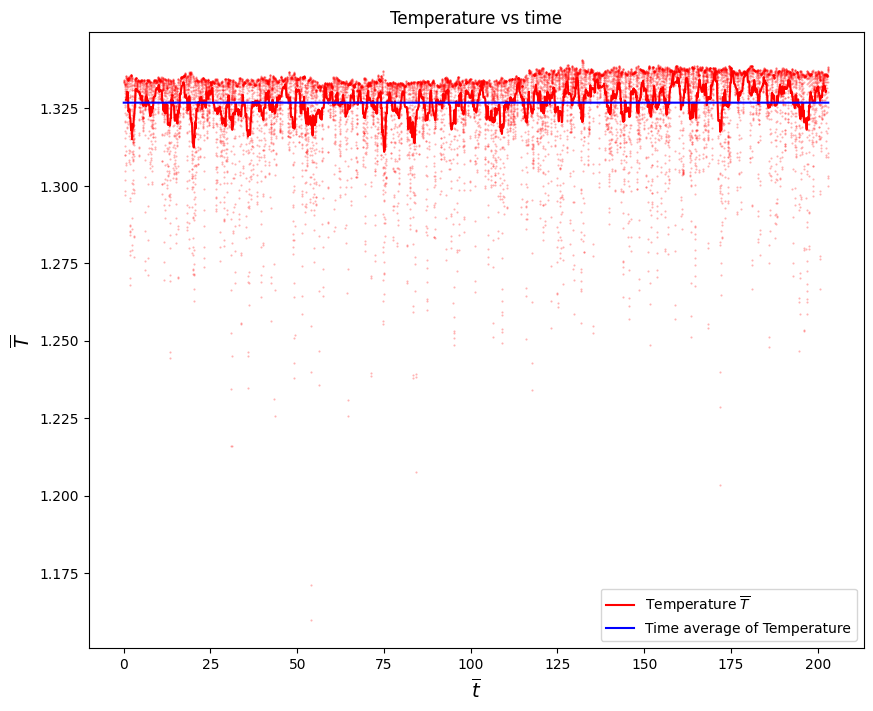

In [26]:
Ek, V, Em  = sim.get_Energy(s)
T = Ek*2/(3*self1.Np)
Tmean = np.mean(T)*np.ones(len(Ek))
#Em_mean = np.mean(Em*2/(3*self1.Np))*np.ones(len(Em))

time1, T1 = moving_mean(time,T,w=100)
plt.figure(figsize=(10,8))
plt.title('Temperature vs time')
plt.ylabel(r'$\overline{T}$',fontsize=14)
plt.xlabel(r'$\overline{t}$',fontsize=14)
plt.plot(time1, T1,'-',color='red',label = r'Temperature $\overline{T}$') ;plt.plot(time, T,'o',color='red',alpha=0.3, ms=0.5)
plt.plot(time, Tmean,'-',color='blue',label = r'Time average of Temperature')
#plt.plot(time, Em_mean,'-',color='cyan',label = r'Time average of $\frac{2}{3N_p}\overline{E}$')
plt.legend()
if local_save: plt.savefig('images/NParticlesGas/'+date+' temperature.png',dpi=350)
plt.show()

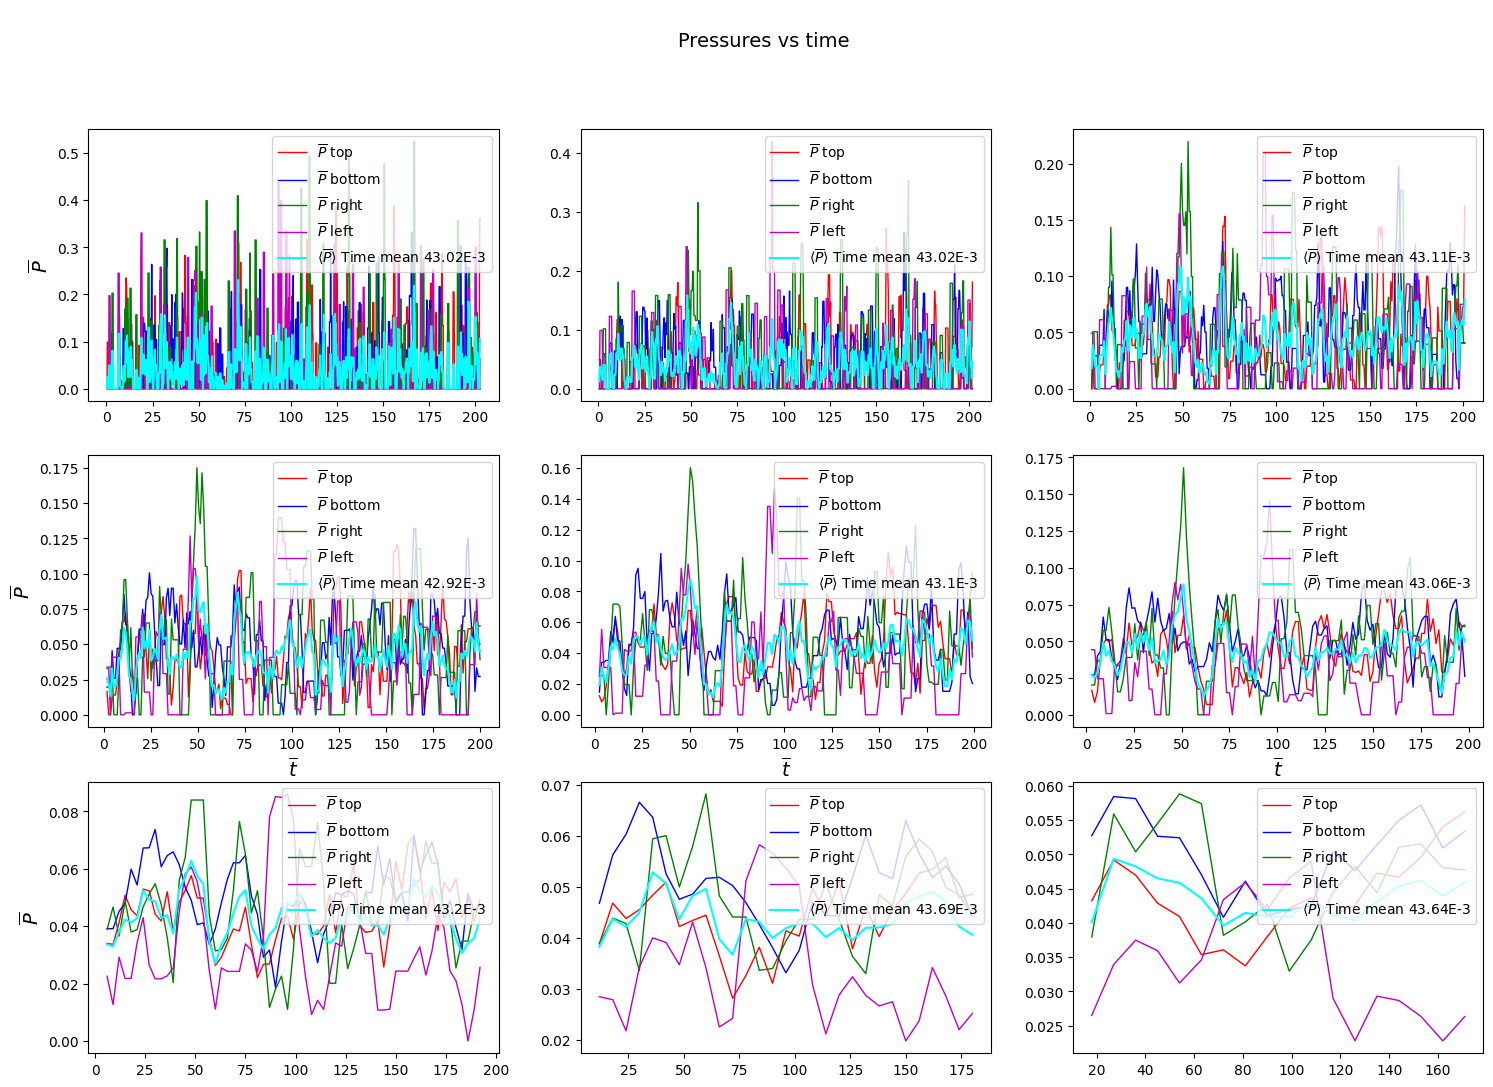

In [27]:
Ldt = [5*h, 10*h, 20*h, 30*h, 40*h, 50*h, 100*h, 200*h, 300*h]
LPmean = press.plot_pressure_charts(s,time,box,Ldt,date=date,save=local_save,dpi=200,backup=True)
plt.show()

In [28]:
Kmean = 3/2*np.mean(T)
P_predicted = 2/3*Np*Kmean/(box[0]*box[1])
k=3
decimals=3

print(f'P predicted: {np.round(np.mean(P_predicted)*10**k,decimals)}E-{k}')
print(f'P obtained: {np.round(np.mean(LPmean)*10**k,decimals)}E-{k}')

print(f'%Error: {np.round(100*np.abs(P_predicted-LPmean[0])/P_predicted,2)}')

P predicted: 53.075E-3
P obtained: 43.195E-3
%Error: 18.94


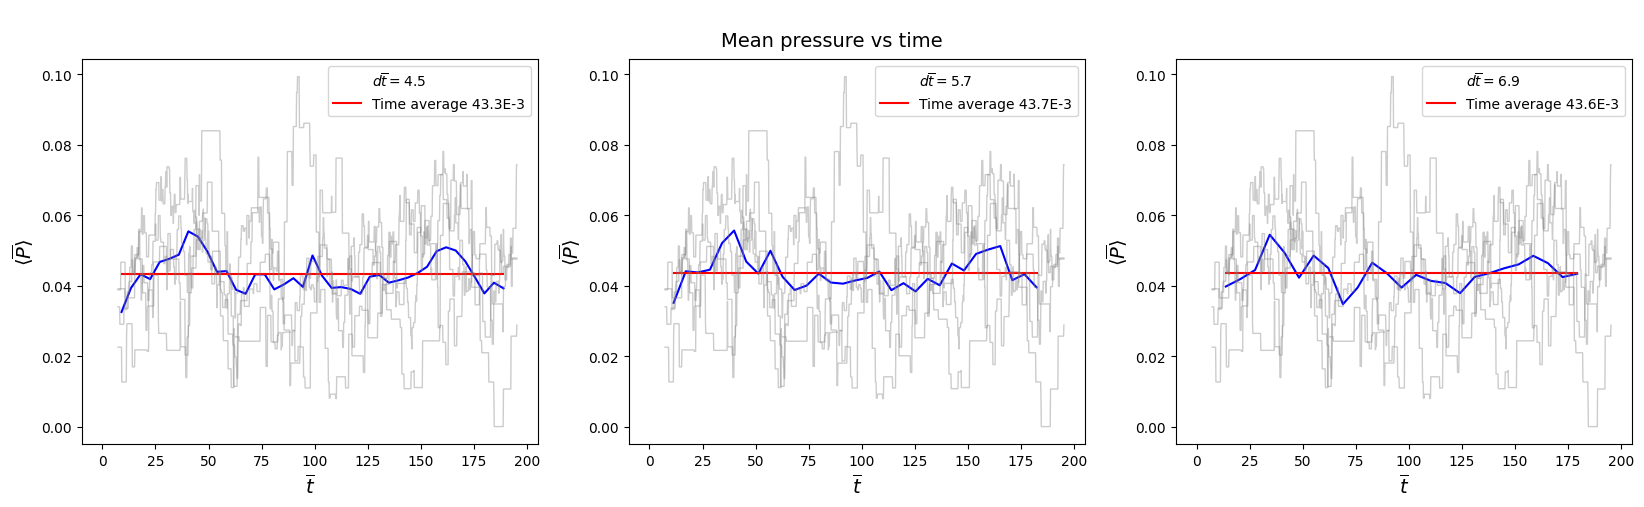

In [35]:
Ldt = [150*h, 190*h, 230*h]
press.plot_pressure_line(s,time,box,Ldt,h,w2=100,date=date,save=local_save)
plt.show()

In [30]:
print('Time for a particle to go to one wall to the other')
print(f'Dt x: {2*box[0]/np.max(np.abs(Vx0))}')
print(f'Dt y: {2*box[1]/np.max(np.abs(Vy0))}')

Time for a particle to go to one wall to the other
Dt x: 49.6127485312573
Dt y: 24.75126499174054


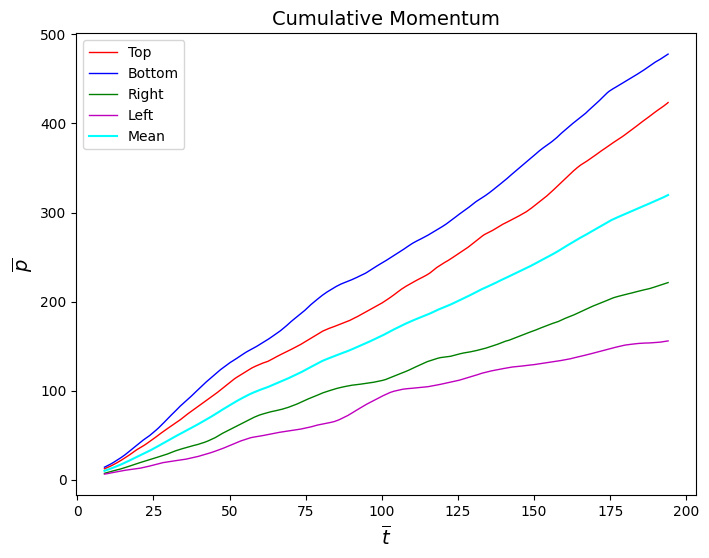

In [31]:
CMPressure = press.plot_cumulative_momentum(s,time,box,h,w=300,date=date,save=local_save,dpi=200)
plt.show()

In [33]:
k = 3 #Set base power
decimals = 3 #Number of decimals

print(f'P predicted: {np.round(np.mean(P_predicted)*10**k,decimals)}E-{k}')
print(f'P from cumulative momentum: {np.round(np.mean(CMPressure)*10**k,decimals)}E-{k}')

print(f'%Error: {np.round(100*np.abs(P_predicted-CMPressure)/P_predicted,2)}')

P predicted: 53.075E-3
P from cumulative momentum: 66.95E-3
%Error: 26.14
